In [174]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [175]:
df = pd.read_csv('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/Cryptography/Project/Fake.csv')
df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [176]:
df.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [177]:
category = df['subject'].value_counts()
category
# plt.plot(category)

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

/home/dheeraj/my_projects/my_project_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


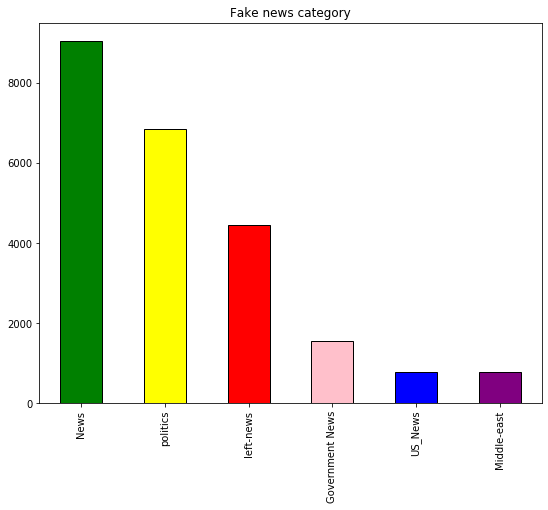

In [178]:
# import random
# r = random.random()
# b = random.random()
# g = random.random()

# colors = [r,g,b]
# color=iter(cm.rainbow(np.linspace(0,1,n)))
# for i in range(n):
#    c=next(color)
colors = ['green', 'yellow', 'red', 'pink', 'blue', 'purple' ]
df['subject'].value_counts().plot(kind='bar',figsize=(9, 7),edgecolor='k',title="Fake news category", colors = colors)
# plt.savefig('Sentiment_bar_plot.png', dpi=100)

In [179]:
# Drop rows which contain any null value (or NaN)
df = df.dropna()
df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [180]:
category = df['subject'].value_counts()
category
# plt.plot(category)

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [181]:
df["label"] = df['subject'].map({'News':0,
'politics' : 1,
'left-news': 2,
'Government News' : 3

 })

In [182]:
# Labeled Dataset
df.label

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23476    NaN
23477    NaN
23478    NaN
23479    NaN
23480    NaN
Name: label, Length: 23481, dtype: float64

In [183]:
model_data = pd.DataFrame()
model_data['text'] = df['text']
model_data['label'] = df['label']
model_data = model_data.dropna()
model_data['text']

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
21915    Don t you just love an entitled IRS lawyer who...
21916    This is a sad commentary on a generation who h...
21917    Yeah that whole  taking up arms  thing seems t...
21918    In case you missed it Sen. Harry Reid (R-NV), ...
21919    The irony here isn t lost on us. Hillary is be...
Name: text, Length: 21920, dtype: object

In [184]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer()
text_counts= cv.fit_transform(model_data['text'])

In [185]:
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, model_data['label'], test_size=0.30, shuffle=True, random_state=42)

In [186]:
Model1 = MultinomialNB().fit(X_train, y_train)
md1predicted= Model1.predict(X_test)


In [187]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, md1predicted))

MultinomialNB Accuracy: 0.5463807785888077


In [188]:
print("confusion_matrix",confusion_matrix(y_test,md1predicted))

confusion_matrix [[2529   71  115   18]
 [ 593  721  615  127]
 [ 208  781  263   70]
 [  70  248   67   80]]


In [189]:
print("classification_report")
print(classification_report(y_test,md1predicted))

classification_report
              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82      2733
         1.0       0.40      0.35      0.37      2056
         2.0       0.25      0.20      0.22      1322
         3.0       0.27      0.17      0.21       465

    accuracy                           0.55      6576
   macro avg       0.41      0.41      0.41      6576
weighted avg       0.50      0.55      0.52      6576



In [190]:
from sklearn.ensemble import GradientBoostingClassifier


In [191]:
model2 = XGBClassifier()
model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
model2 = GradientBoostingClassifier()
model2.fit(X_train, y_train)

In [193]:
md2predicted = model2.predict(X_test)

In [194]:
print("Random Forest Accuracy",metrics.accuracy_score(y_test, md2predicted))

Random Forest Accuracy 0.6236313868613139


In [130]:
print("confusion_matrix",confusion_matrix(y_test,md2predicted))

confusion_matrix [[1193  482   55]
 [ 956  114   15]
 [ 330   52   21]]


In [108]:
print("classification_report")
print(classification_report(y_test,md2predicted))

classification_report
              precision    recall  f1-score   support

         0.0       0.75      0.88      0.81      2733
         1.0       0.41      0.51      0.45      2056
         2.0       0.21      0.12      0.15      1322
         3.0       0.18      0.04      0.07       465

    accuracy                           0.55      6576
   macro avg       0.39      0.39      0.37      6576
weighted avg       0.50      0.55      0.51      6576



###### 

In [ ]:
x = df['Description.of.incident']
y = df['label']
print(x.shape)
print(y.shape)

In [67]:
# Dividing whole dataset into training(75%) and testing(25%) datasets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'x' is not defined

In [ ]:
# Vectorization using CountVectorizer
Vec = CountVectorizer()
X_train_counts = Vec.fit_transform(X_train)

In [ ]:
X_train_counts

In [ ]:
X_train_counts.shape

In [ ]:
# Vectorization using Tfidf
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

In [ ]:
# Model1
mod1 = MultinomialNB().fit(X_train_tfidf,y_train)
from sklearn.pipeline import Pipeline
text_mod1 = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()), ('mod1', MultinomialNB()),])

In [ ]:
%time text_mod1 = text_mod1.fit(X_train, y_train)